In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import collections

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from nltk import word_tokenize

from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from pickle import load
cnn_stories_df = load(open('preprocessed_cnn_stories_df.pkl', 'rb'))

In [3]:
cnn_stories_df.head()

date                                              story  \
0 2012-07-03  At the start of a big week for the Higgs boson...   
1 2015-01-13  (CNN)George Zimmerman -- acquitted by a Florid...   
2 2010-03-27  (CNN) -- Zlatan Ibrahimovic scored his third g...   
3 2009-09-13  (CNN) -- Nobel laureate Norman E. Borlaug, an ...   
4 2015-01-21  (CNN)Louisiana Gov. Bobby Jindal on Monday sto...   

                                          highlights  sentences  \
0  [U.S.-based scientists say their data points t...         20   
1  [Zimmerman posts $5,000 bail; he was accused o...         35   
2  [Barcelona move three points clear of Real Mad...         17   
3  [Borlaug died at the age of 95 from complicati...         17   
4  [Louisiana Gov. Bobby Jindal decried "no-go zo...         38   

                                       story_cleaned  \
0  start big week higgs boson particle physic sci...   
1  george zimmerman acquit florida jury death tra...   
2  zlatan ibrahimovic score goal game continue re...   
3  nobel laureate norman borlaug agricultural sci...   
4  louisiana gov bobby jindal monday stood critic...   

                                  highlights_cleaned  \
0  [scientist data point existence higgs boson, f...   
1  [zimmerman post bail accuse throw bottle girlf...   
2  [barcelona point clear real madrid victory mal...   
3  [borlaug die age complication cause cancer, aw...   
4  [louisiana gov bobby jindal decry zone soverei...   

                                       story_summary  \
0  At the start of a big week for the Higgs boson...   
1  (CNN)George Zimmerman -- acquitted by a Florid...   
2  (CNN) -- Zlatan Ibrahimovic scored his third g...   
3  Borlaug, an agricultural scientist who helped ...   
4  (CNN)Louisiana Gov. Bobby Jindal on Monday sto...   

                               story_summary_cleaned  
0  start big week higgs boson particle physic sci...  
1  george zimmerman acquit florida jury death tra...  
2  zlatan ibrahimovic score goal game continue re...  
3  borlaug agricultural scientist help develop wh...  
4  louisiana gov bobby jindal monday stood critic...

In [4]:
cnn_stories_df.shape

(92008, 8)

In [5]:
X_train, X_test = train_test_split(cnn_stories_df['story_cleaned'], random_state=42, test_size=0.2)

In [6]:
X_train.shape, X_test.shape

((73606,), (18402,))

In [7]:
train_text_data = X_train.apply(word_tokenize)

In [8]:
vectorizer = CountVectorizer()

data_vectorized = vectorizer.fit_transform(X_train)

data_vectorized.shape

(73606, 173719)

In [9]:
initial = datetime.now()
initial_time = initial.strftime("%H:%M:%S")
print(f'Beginning at {initial_time}')

lda_model = LatentDirichletAllocation(n_components=20, 
                                      random_state=42,       
                                      n_jobs = -1  
                                     )
lda_model.fit_transform(data_vectorized)

finished = datetime.now()
print(f'Finished in {(finished-initial).seconds//60}M:{(finished-initial).seconds%60}S')

Beginning at 13:40:57
Finished in 5M:24S


In [10]:
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
10     -10.878068   10.538728       1        1  9.615708
14     -60.884026  -75.591820       2        1  8.207858
6       -2.336119  -53.289074       3        1  8.207544
18     -61.385319  -12.914634       4        1  7.218463
9      -28.737743  126.296997       5        1  6.440543
7        1.066606 -123.552811       6        1  6.227954
19      45.140720   -7.947869       7        1  6.194117
3     -140.795975  -98.530548       8        1  5.476200
16      61.531681  -83.240562       9        1  5.062607
8      -72.563057 -140.396881      10        1  4.716676
2       15.984491   63.578186      11        1  4.581173
5     -160.851624   68.945145      12        1  3.960594
11      85.961830   51.922935      13        1  3.756153
15     -99.020836  109.936348      14        1  3.606334
12    -176.764130   -8.681684      15        1  3.244987
13    -117.189880  -37.420200      16        1  3.060660
0      108.829918  -22.946203      17        1  2.948269
4       47.588097  121.934814      18        1  2.708585
1     -106.467834   30.176889      19        1  2.624087
17     -50.613804   59.328842      20        1  2.141486, topic_info=                 Term          Freq          Total Category  logprob  loglift
120073         police  53310.000000   53310.000000  Default  30.0000  30.0000
110202          obama  41030.000000   41030.000000  Default  29.0000  29.0000
135909         school  29595.000000   29595.000000  Default  28.0000  28.0000
27724           china  18709.000000   18709.000000  Default  27.0000  27.0000
147630        student  20122.000000   20122.000000  Default  26.0000  26.0000
...               ...           ...            ...      ...      ...      ...
20710         britain   1404.465523    4994.379851  Topic20  -5.7741   2.5750
170794           year   1972.429174  116704.588812  Topic20  -5.4344  -0.2367
33750          crisis   1411.661019    8196.005842  Topic20  -5.7689   2.0848
72343   international   1572.763009   26421.813860  Topic20  -5.6609   1.0223
154583           time   1591.702979   90441.678082  Topic20  -5.6489  -0.1962

[1707 rows x 6 columns], token_table=        Topic      Freq           Term
term                                  
169         6  0.001221          abbas
169        10  0.181937          abbas
169        14  0.815666          abbas
195        10  0.996447     abbottabad
405        10  0.997940  abdulmutallab
...       ...       ...            ...
173321     17  0.002263            zoo
173321     18  0.003771            zoo
173321     19  0.004525            zoo
173459      4  0.982480       zubaydah
173489      8  0.998610     zuckerberg

[10845 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 15, 7, 19, 10, 8, 20, 4, 17, 9, 3, 6, 12, 16, 13, 14, 1, 5, 2, 18])

In [11]:
coherence_lda = metric_coherence_gensim(measure='c_v',
                        top_n=25, 
                        topic_word_distrib=lda_model.components_, 
                        dtm=data_vectorized, 
                        vocab=np.array([x for x in vectorizer.vocabulary_.keys()]), 
                        texts=train_text_data,
                        return_mean=True)

coherence_lda

0.6081764456653004

In [12]:
vectorizer = CountVectorizer(min_df=5,                                                     
                             token_pattern='[a-zA-Z]{4,}'         
                            )

data_vectorized = vectorizer.fit_transform(X_train)

In [13]:
data_vectorized.shape

(73606, 50010)

In [14]:
initial = datetime.now()
initial_time = initial.strftime("%H:%M:%S")
print(f'Beginning at {initial_time}')

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      random_state=42,       
                                      n_jobs = -1  
                                     )
lda_model.fit_transform(data_vectorized)

finished = datetime.now()
print(f'Finished in {(finished-initial).seconds//60}M:{(finished-initial).seconds%60}S')

pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

Beginning at 13:52:28
Finished in 5M:41S


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      -10.878068   10.538728       1        1  10.508478
12     -60.884026  -75.591820       2        1   7.413854
15      -2.336119  -53.289074       3        1   7.263689
17     -61.385319  -12.914634       4        1   6.779501
9      -28.737743  126.296997       5        1   6.386440
1        1.066606 -123.552811       6        1   6.212981
13      45.140720   -7.947869       7        1   6.191788
0     -140.795975  -98.530548       8        1   6.026714
8       61.531681  -83.240562       9        1   5.783320
19     -72.563057 -140.396881      10        1   5.590841
6       15.984491   63.578186      11        1   4.430622
2     -160.851624   68.945145      12        1   4.018325
4       85.961830   51.922935      13        1   3.996525
16     -99.020836  109.936348      14        1   3.348788
18    -176.764130   -8.681684      15        1   3.239760
7     -117.189880  -37.420200      16        1   3.025111
11     108.829918  -22.946203      17        1   3.023870
14      47.588097  121.934814      18        1   2.436049
10    -106.467834   30.176889      19        1   2.347283
5      -50.613804   59.328842      20        1   1.976059, topic_info=             Term          Freq          Total Category  logprob  loglift
34285      police  53644.000000   53644.000000  Default  30.0000  30.0000
31473       obama  40607.000000   40607.000000  Default  29.0000  29.0000
49033       woman  43531.000000   43531.000000  Default  28.0000  28.0000
18182  government  55642.000000   55642.000000  Default  27.0000  27.0000
7914        child  41355.000000   41355.000000  Default  26.0000  26.0000
...           ...           ...            ...      ...      ...      ...
44919        told   2118.943980   66394.069657  Topic20  -5.2063   0.4794
28719        mile   1464.097315   11481.730021  Topic20  -5.5759   1.8645
48356        week   1493.304745   43514.541989  Topic20  -5.5562   0.5520
44763        time   1530.350584   90815.811333  Topic20  -5.5317  -0.1593
33350      people   1450.470197  115085.250201  Topic20  -5.5853  -0.4497

[1739 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
41        10  0.995568  abbottabad
107        8  0.009600      abedin
107       15  0.979233      abedin
126       11  0.992322     abhisit
138       11  0.994193     abidjan
...      ...       ...         ...
49877     19  0.994945        zhou
49905      3  0.999442   zimmerman
49918     15  0.990972     zinkhan
49976     15  0.990893       zovko
50008     13  0.994397       zynga

[11035 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 13, 16, 18, 10, 2, 14, 1, 9, 20, 7, 3, 5, 17, 19, 8, 12, 15, 11, 6])

In [15]:
coherence_lda = metric_coherence_gensim(measure='c_v',
                        top_n=25, 
                        topic_word_distrib=lda_model.components_, 
                        dtm=data_vectorized, 
                        vocab=np.array([x for x in vectorizer.vocabulary_.keys()]), 
                        texts=train_text_data,
                        return_mean=True)

coherence_lda

0.6775657571176128

In [16]:
vectorizer = CountVectorizer(min_df=10,                                                     
                             token_pattern='[a-zA-Z]{4,}'         
                            )

data_vectorized = vectorizer.fit_transform(X_train)

In [17]:
data_vectorized.shape

(73606, 35222)

In [18]:
initial = datetime.now()
initial_time = initial.strftime("%H:%M:%S")
print(f'Beginning at {initial_time}')

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      random_state=42,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_model.fit_transform(data_vectorized)

finished = datetime.now()
print(f'Finished in {(finished-initial).seconds//60}M:{(finished-initial).seconds%60}S')

pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

Beginning at 13:59:32
Finished in 7M:22S


PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
4      -10.878068   10.538728       1        1  9.585955
2      -60.884026  -75.591820       2        1  7.409543
14      -2.336119  -53.289074       3        1  7.020371
9      -61.385319  -12.914634       4        1  6.353785
1      -28.737743  126.296997       5        1  6.346069
8        1.066606 -123.552811       6        1  6.139224
16      45.140720   -7.947869       7        1  5.970666
5     -140.795975  -98.530548       8        1  5.759639
11      61.531681  -83.240562       9        1  5.568704
18     -72.563057 -140.396881      10        1  5.257276
7       15.984491   63.578186      11        1  4.675376
19    -160.851624   68.945145      12        1  4.674910
17      85.961830   51.922935      13        1  4.613756
10     -99.020836  109.936348      14        1  4.285128
6     -176.764130   -8.681684      15        1  3.477658
15    -117.189880  -37.420200      16        1  3.071462
12     108.829918  -22.946203      17        1  2.859077
3       47.588097  121.934814      18        1  2.596519
0     -106.467834   30.176889      19        1  2.178733
13     -50.613804   59.328842      20        1  2.156149, topic_info=             Term          Freq         Total Category  logprob  loglift
24108      police  53660.000000  53660.000000  Default  30.0000  30.0000
22075       obama  41249.000000  41249.000000  Default  29.0000  29.0000
7118        court  32916.000000  32916.000000  Default  28.0000  28.0000
5544        child  41421.000000  41421.000000  Default  27.0000  27.0000
26306  republican  21622.000000  21622.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
1996       attack   1978.877053  32953.150892  Topic20  -5.3536   1.0243
31689        told   2270.553254  66327.146063  Topic20  -5.2161   0.4623
34733       write   1811.057674  24593.769827  Topic20  -5.4422   1.2283
31593        time   1897.690703  90912.422826  Topic20  -5.3955  -0.0324
22223    official   1713.036488  48778.523001  Topic20  -5.4978   0.4878

[1744 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
24         4  0.996680  abbottabad
67         1  0.972253   abenomics
94         3  0.002670      aboard
94         4  0.004006      aboard
94         6  0.017358      aboard
...      ...       ...         ...
35159     10  0.979583   zimmerman
35159     18  0.020123   zimmerman
35167     16  0.990038      zintan
35198      7  0.987316    zubaydah
35212     19  0.997093        zuma

[11001 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 15, 10, 2, 9, 17, 6, 12, 19, 8, 20, 18, 11, 7, 16, 13, 4, 1, 14])

In [19]:
coherence_lda = metric_coherence_gensim(measure='c_v',
                        top_n=25, 
                        topic_word_distrib=lda_model.components_, 
                        dtm=data_vectorized, 
                        vocab=np.array([x for x in vectorizer.vocabulary_.keys()]), 
                        texts=train_text_data,
                        return_mean=True)

coherence_lda

0.6414962734432172

In [20]:
vectorizer = CountVectorizer(min_df=50,                                                     
                             token_pattern='[a-zA-Z]{4,}'         
                            )

data_vectorized = vectorizer.fit_transform(X_train)

In [21]:
data_vectorized.shape

(73606, 16342)

In [22]:
initial = datetime.now()
initial_time = initial.strftime("%H:%M:%S")
print(f'Beginning at {initial_time}')

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      random_state=42,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_model.fit_transform(data_vectorized)

finished = datetime.now()
print(f'Finished in {(finished-initial).seconds//60}M:{(finished-initial).seconds%60}S')

pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

Beginning at 14:08:26
Finished in 5M:12S


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
10     -10.878068   10.538728       1        1  10.390431
0      -60.884026  -75.591820       2        1   8.540476
2       -2.336119  -53.289074       3        1   7.705983
14     -61.385319  -12.914634       4        1   6.873425
17     -28.737743  126.296997       5        1   6.474989
3        1.066606 -123.552811       6        1   6.445697
5       45.140720   -7.947869       7        1   5.521813
13    -140.795975  -98.530548       8        1   5.450059
6       61.531681  -83.240562       9        1   4.521910
16     -72.563057 -140.396881      10        1   4.272996
8       15.984491   63.578186      11        1   4.229841
11    -160.851624   68.945145      12        1   4.226132
12      85.961830   51.922935      13        1   4.201658
18     -99.020836  109.936348      14        1   4.122675
19    -176.764130   -8.681684      15        1   3.932036
4     -117.189880  -37.420200      16        1   3.066221
7      108.829918  -22.946203      17        1   3.021018
1       47.588097  121.934814      18        1   2.908949
9     -106.467834   30.176889      19        1   2.378275
15     -50.613804   59.328842      20        1   1.715416, topic_info=                Term          Freq         Total Category  logprob  loglift
11118         police  53140.000000  53140.000000  Default  30.0000  30.0000
10143          obama  42108.000000  42108.000000  Default  29.0000  29.0000
3394           court  33287.000000  33287.000000  Default  28.0000  28.0000
12892         school  29690.000000  29690.000000  Default  27.0000  27.0000
2514           child  41582.000000  41582.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
7630   international   1337.834709  26804.308237  Topic20  -5.4827   1.0680
2619            city   1355.228086  40231.232811  Topic20  -5.4698   0.6748
312           agency   1280.263514  18198.854271  Topic20  -5.5267   1.4112
15362         united   1260.019888  43859.836289  Topic20  -5.5426   0.5156
9189         medical   1237.190034  12195.081125  Topic20  -5.5609   1.7773

[1624 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
23        18  0.990757      abdulaziz
25        11  0.997651  abdulmutallab
30         8  0.991912        abhisit
47         4  0.187768       abortion
47         6  0.002037       abortion
...      ...       ...            ...
16335     18  0.007271         zombie
16335     20  0.014543         zombie
16338      1  0.001611     zuckerberg
16338     13  0.996934     zuckerberg
16341      1  0.994884      zvonareva

[10614 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 1, 3, 15, 18, 4, 6, 14, 7, 17, 9, 12, 13, 19, 20, 5, 8, 2, 10, 16])

In [23]:
coherence_lda = metric_coherence_gensim(measure='c_v',
                        top_n=25, 
                        topic_word_distrib=lda_model.components_, 
                        dtm=data_vectorized, 
                        vocab=np.array([x for x in vectorizer.vocabulary_.keys()]), 
                        texts=train_text_data,
                        return_mean=True)

coherence_lda

0.5875480427830099

In [27]:
def model_lda_coherence_values(text_data, vectorizer, data_vectorized, limit=20, start=2, step=3):
    """
    Fits and Transforms a CountVectorizer DTM to various LDA models of different topic sizes.
    Compute c_v coherence for each model. 

    Parameters:
    ----------
    text_data : List of input tokenized texts
    vectorizer : CountVectorizer() fitted to text_data
    data_vectorized : Document-term matrix of text_data
    limit : Max num of topics

    Returns:
    -------
    model_dict : Dictionary of LDA topic models with keys n_topics_model where n is the # of topics
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_dict = {}
    for num_topics in range(start, limit, step):
        initial = datetime.now()
        initial_time = initial.strftime("%H:%M:%S")
        print(f'Beginning {num_topics}_topics_model at {initial_time}')
        
        lda_model = LatentDirichletAllocation(n_components=num_topics, # Number of topics
                                      random_state=42,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
        lda_model.fit(data_vectorized)
        model_dict[f'{num_topics}_topics_model'] = lda_model
        
        coherence_lda = metric_coherence_gensim(measure='c_v',
                        top_n=25, 
                        topic_word_distrib=lda_model.components_, 
                        dtm=data_vectorized, 
                        vocab=np.array([x for x in vectorizer.vocabulary_.keys()]), 
                        texts=text_data,
                        return_mean=True)
        coherence_values.append(coherence_lda)
        finished = datetime.now()
        print(f'Finished {num_topics}_topics_model in {(finished-initial).seconds//60}M:{(finished-initial).seconds%60}S')
    
    return model_dict, coherence_values

In [25]:
vectorizer = CountVectorizer(min_df=5,                                                     
                             token_pattern='[a-zA-Z]{4,}'         
                            )

data_vectorized = vectorizer.fit_transform(X_train)

In [28]:
# train_text_data = X_train.apply(word_tokenize)

model_dict, coherence_values = model_lda_coherence_values(train_text_data, vectorizer, data_vectorized, limit=25, start=2, step=2)

Beginning 2_topics_model at 14:18:51
Finished 2_topics_model in 6M:53S
Beginning 4_topics_model at 14:25:45
Finished 4_topics_model in 5M:38S
Beginning 6_topics_model at 14:31:24
Finished 6_topics_model in 5M:49S
Beginning 8_topics_model at 14:37:13
Finished 8_topics_model in 7M:27S
Beginning 10_topics_model at 14:44:40
Finished 10_topics_model in 7M:23S
Beginning 12_topics_model at 14:52:04
Finished 12_topics_model in 8M:44S
Beginning 14_topics_model at 15:00:49
Finished 14_topics_model in 8M:40S
Beginning 16_topics_model at 15:09:29
Finished 16_topics_model in 8M:43S
Beginning 18_topics_model at 15:18:13
Finished 18_topics_model in 9M:10S
Beginning 20_topics_model at 15:27:24
Finished 20_topics_model in 9M:59S
Beginning 22_topics_model at 15:37:24
Finished 22_topics_model in 7M:3S
Beginning 24_topics_model at 15:44:27
Finished 24_topics_model in 8M:24S


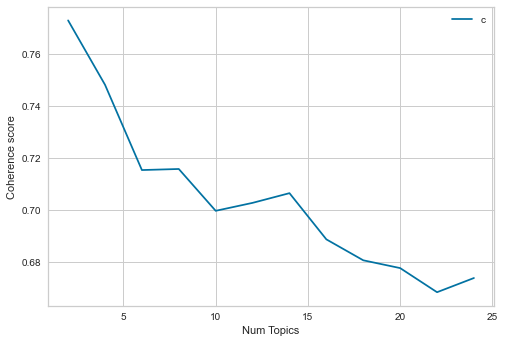

In [32]:
limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [42]:
scores = []
perplexities = []
for model in model_dict.values():
    scores.append(model.score(data_vectorized))
    perplexities.append(model.perplexity(data_vectorized))

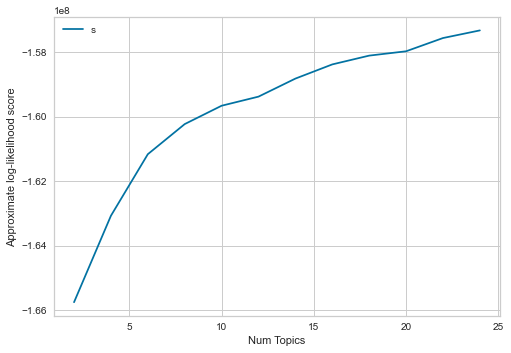

In [43]:
limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, scores)
plt.xlabel("Num Topics")
plt.ylabel("Approximate log-likelihood score")
plt.legend(("scores"), loc='best')
plt.show()

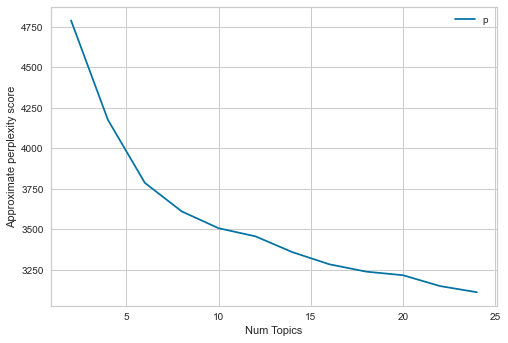

In [44]:
limit=25; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexities)
plt.xlabel("Num Topics")
plt.ylabel("Approximate perplexity score")
plt.legend(("perplexities"), loc='best')
plt.show()

In [34]:
model_dict['8_topics_model']

LatentDirichletAllocation(n_components=8, n_jobs=-1, random_state=42)

In [103]:
coherence_values[3], perplexities[3]

(0.715670198029821, 3611.4516829778386)

In [35]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(model_dict['8_topics_model'], data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5     -108.958252 -208.941483       1        1  16.864602
1      186.487061  -98.103249       2        1  14.796107
3       19.245832  160.858780       3        1  14.654399
7      170.658829   75.445076       4        1  13.304512
0       -1.386411  -35.043739       5        1  11.307543
4     -145.800095  106.944611       6        1  11.265746
6       64.834541 -221.825272       7        1   8.970788
2     -196.906036  -58.990913       8        1   8.836303, topic_info=            Term          Freq         Total Category  logprob  loglift
31473      obama  41231.000000  41231.000000  Default  30.0000  30.0000
34285     police  54190.000000  54190.000000  Default  29.0000  29.0000
34881  president  56729.000000  56729.000000  Default  28.0000  28.0000
17090       game  25625.000000  25625.000000  Default  27.0000  27.0000
9963       court  33354.000000  33354.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
31891       open   6123.282039  20313.533938   Topic8  -5.6429   1.2271
25240       lead   6230.247724  29761.705499   Topic8  -5.6255   0.8625
44919       told   7193.526210  66549.230153   Topic8  -5.4818   0.2015
42295      start   5845.633697  31230.921630   Topic8  -5.6893   0.7506
18361      great   5155.036643  24804.059363   Topic8  -5.8150   0.8553

[728 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
396        1  0.018840       acre
396        2  0.000942       acre
396        5  0.002826       acre
396        6  0.976871       acre
421        1  0.942558      actor
...      ...       ...        ...
49607      6  0.017816      young
49607      7  0.011955      young
49607      8  0.086055      young
49827      3  0.998359     zelaya
49905      4  0.999814  zimmerman

[2805 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 4, 8, 1, 5, 7, 3])

In [45]:
lda_output = model_dict['8_topics_model'].transform(data_vectorized)

In [46]:
lda_output.shape

(73606, 8)

In [47]:
lda_output[0]

array([2.36977100e-03, 3.58647419e-04, 3.58739543e-04, 3.58664626e-04,
       1.30503192e-01, 8.40402857e-02, 3.36341913e-02, 7.48376508e-01])

In [48]:
results = [[(vectorizer.get_feature_names()[i], topic[i])
            for i in topic.argsort()[:-30-1:-1]]
          for topic in (model_dict['8_topics_model'].components_ / model_dict['8_topics_model'].components_.sum(axis=1)[:, np.newaxis])]

results

[[('people', 0.009785780074064979),
  ('child', 0.008994954182025151),
  ('health', 0.008581763593714797),
  ('school', 0.008266148170510525),
  ('year', 0.007931463858570222),
  ('student', 0.006630646740485405),
  ('woman', 0.006439930391687248),
  ('work', 0.005839746706508575),
  ('state', 0.0055388321787016),
  ('care', 0.004841231911441516),
  ('time', 0.004462045087048676),
  ('study', 0.004345819959566115),
  ('country', 0.004098238120733937),
  ('life', 0.003937786382547507),
  ('doctor', 0.003926476853166576),
  ('family', 0.0038375617749389435),
  ('university', 0.003832366301585545),
  ('hospital', 0.0037628203264329935),
  ('patient', 0.0037492772411130376),
  ('high', 0.0037374604071333424),
  ('medical', 0.003724279050439767),
  ('disease', 0.0035330549036164034),
  ('food', 0.0034981310899503525),
  ('program', 0.0034668490974567785),
  ('report', 0.0033784000901541265),
  ('drug', 0.0032797884008110875),
  ('problem', 0.003270958153659794),
  ('case', 0.003027450264884

In [53]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 4, figsize=(25, 20), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

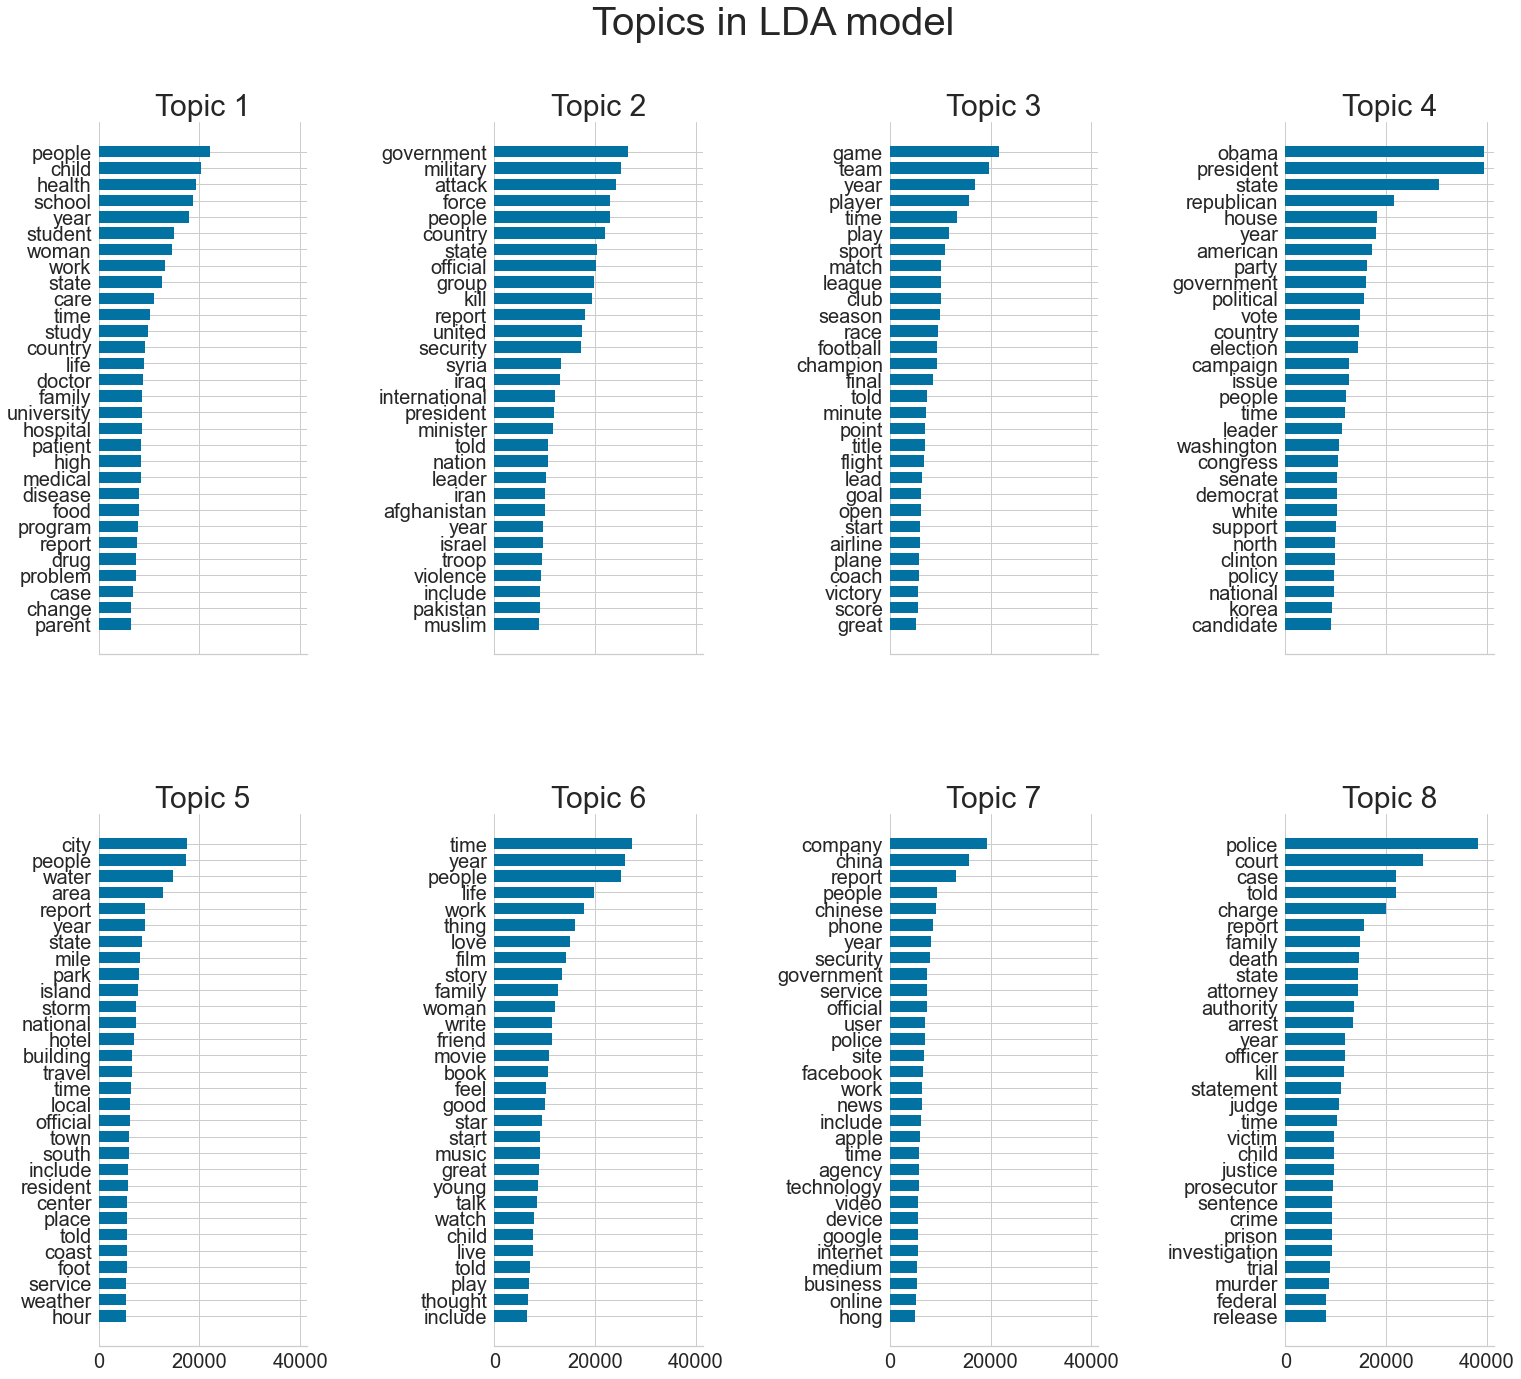

In [54]:
feature_names = vectorizer.get_feature_names()
n_top_words = 30
plot_top_words(model_dict['8_topics_model'], feature_names, n_top_words, 'Topics in LDA model')

In [79]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=model_dict['8_topics_model'], n_words=30)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0     Word 1  Word 2      Word 3   Word 4   Word 5  \
Topic 0      people      child  health      school     year  student   
Topic 1  government   military  attack       force   people  country   
Topic 2        game       team    year      player     time     play   
Topic 3       obama  president   state  republican    house     year   
Topic 4        city     people   water        area   report     year   
Topic 5        time       year  people        life     work    thing   
Topic 6     company      china  report      people  chinese    phone   
Topic 7      police      court    case        told   charge   report   

           Word 6    Word 7      Word 8     Word 9  ...  Word 20     Word 21  \
Topic 0     woman      work       state       care  ...  medical     disease   
Topic 1     state  official       group       kill  ...   leader        iran   
Topic 2     sport     match      league       club  ...     lead        goal   
Topic 3  american     party  government  political  ...   senate    democrat   
Topic 4     state      mile        park     island  ...  include    resident   
Topic 5      love      film       story     family  ...    great       young   
Topic 6      year  security  government    service  ...   agency  technology   
Topic 7    family     death       state   attorney  ...  justice  prosecutor   

             Word 22  Word 23  Word 24        Word 25   Word 26   Word 27  \
Topic 0         food  program   report           drug   problem      case   
Topic 1  afghanistan     year   israel          troop  violence   include   
Topic 2         open    start  airline          plane     coach   victory   
Topic 3        white  support    north        clinton    policy  national   
Topic 4       center    place     told          coast      foot   service   
Topic 5         talk    watch    child           live      told      play   
Topic 6        video   device   google       internet    medium  business   
Topic 7     sentence    crime   prison  investigation     trial    murder   

          Word 28    Word 29  
Topic 0    change     parent  
Topic 1  pakistan     muslim  
Topic 2     score      great  
Topic 3     korea  candidate  
Topic 4   weather       hour  
Topic 5   thought    include  
Topic 6    online       hong  
Topic 7   federal    release  

[8 rows x 30 columns]

In [80]:
topics_theme = ['Life in general/Family/Marriage/Health/Education/Medical',
                'War/World Governments/Military/International Relations/Middle East/Violence',
                'Sports/Games/Teams/Airlines',
                'US Politics/US Government/President/Election',
                'State/Travel/Weather/Natural Disasters',
                'Entertainment/People/Films/Books/Family/Love',
                'Technology/Science/Business/China/Internet',
                'Police/Crime/Court/Death/Investigations']
df_topic_keywords['topic_theme'] = topics_theme

In [81]:
df_topic_keywords.set_index('topic_theme', inplace=True)

In [82]:
df_topic_keywords.T

topic_theme Life in general/Family/Marriage/Health/Education/Medical  \
Word 0                                                  people         
Word 1                                                   child         
Word 2                                                  health         
Word 3                                                  school         
Word 4                                                    year         
Word 5                                                 student         
Word 6                                                   woman         
Word 7                                                    work         
Word 8                                                   state         
Word 9                                                    care         
Word 10                                                   time         
Word 11                                                  study         
Word 12                                                country         
Word 13                                                   life         
Word 14                                                 doctor         
Word 15                                                 family         
Word 16                                             university         
Word 17                                               hospital         
Word 18                                                patient         
Word 19                                                   high         
Word 20                                                medical         
Word 21                                                disease         
Word 22                                                   food         
Word 23                                                program         
Word 24                                                 report         
Word 25                                                   drug         
Word 26                                                problem         
Word 27                                                   case         
Word 28                                                 change         
Word 29                                                 parent         

topic_theme War/World Governments/Military/International Relations/Middle East/Violence  \
Word 0                                              government                            
Word 1                                                military                            
Word 2                                                  attack                            
Word 3                                                   force                            
Word 4                                                  people                            
Word 5                                                 country                            
Word 6                                                   state                            
Word 7                                                official                            
Word 8                                                   group                            
Word 9                                                    kill                            
Word 10                                                 report                            
Word 11                                                 united                            
Word 12                                               security                            
Word 13                                                  syria                            
Word 14                                                   iraq                            
Word 15                                          international                            
Word 16                                              president                            
Word 17                                               minister                            
Word 18                               

In [83]:
lda_output

array([[2.36977100e-03, 3.58647419e-04, 3.58739543e-04, ...,
        8.40402857e-02, 3.36341913e-02, 7.48376508e-01],
       [5.90333500e-04, 8.15874866e-01, 5.90926747e-04, ...,
        5.90436914e-04, 5.90445696e-04, 7.66097434e-02],
       [4.42508396e-04, 4.42349169e-04, 4.42312347e-04, ...,
        4.42484104e-04, 4.42595507e-04, 9.35420134e-01],
       ...,
       [2.91810399e-04, 2.91792341e-04, 3.82623923e-02, ...,
        3.38369983e-01, 6.21908607e-01, 2.91874308e-04],
       [7.81989370e-04, 7.82099408e-04, 9.19978820e-01, ...,
        5.16008626e-02, 7.82633969e-04, 7.82174319e-04],
       [5.66415031e-04, 5.66283368e-04, 2.53953026e-02, ...,
        8.36126331e-02, 9.41552287e-02, 6.39863482e-01]])

In [84]:
topicnames = df_topic_keywords.T.columns

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=X_train.index)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [85]:
df_document_topic

topic_theme  Life in general/Family/Marriage/Health/Education/Medical  \
53087                                                     0.00          
28975                                                     0.00          
89890                                                     0.00          
86979                                                     0.90          
53207                                                     0.79          
...                                                        ...          
9890                                                      0.00          
38134                                                     0.00          
87607                                                     0.00          
65193                                                     0.00          
48314                                                     0.00          

topic_theme  War/World Governments/Military/International Relations/Middle East/Violence  \
53087                                                     0.00                             
28975                                                     0.82                             
89890                                                     0.00                             
86979                                                     0.00                             
53207                                                     0.01                             
...                                                        ...                             
9890                                                      0.30                             
38134                                                     0.00                             
87607                                                     0.00                             
65193                                                     0.00                             
48314                                                     0.00                             

topic_theme  Sports/Games/Teams/Airlines  \
53087                               0.00   
28975                               0.00   
89890                               0.00   
86979                               0.00   
53207                               0.01   
...                                  ...   
9890                                0.00   
38134                               0.00   
87607                               0.04   
65193                               0.92   
48314                               0.03   

topic_theme  US Politics/US Government/President/Election  \
53087                                                0.00   
28975                                                0.00   
89890                                                0.00   
86979                                                0.00   
53207                                                0.01   
...                                                   ...   
9890                                                 0.00   
38134                                                0.00   
87607                                                0.00   
65193                                                0.02   
48314                                                0.00   

topic_theme  State/Travel/Weather/Natural Disasters  \
53087                                          0.13   
28975                                          0.10   
89890                                          0.06   
86979                                          0.00   
53207                                          0.01   
...                                             ...   
9890                                           0.00   
38134                                          0.75   
87607                                          0.00   
65193                                          0.00   
48314                                          0.16   

topic_theme  Entertainment/People/Films/Books/Family/Love  \
53087                             

In [65]:
X_train.head()

53087    authority hannah graham human remains saturday...
28975    jerusalem israeli settler damage car burn hous...
89890    orleans louisiana grand jury indict people sho...
86979    pfizer recall additional bottle drug lipitor r...
53207    student news january download pdf map today mi...
Name: story_cleaned, dtype: object

In [87]:
df_sent_topic= pd.merge(X_train, df_document_topic, left_index=True, right_index=True)

In [88]:
df_sent_topic

story_cleaned  \
53087  authority hannah graham human remains saturday...   
28975  jerusalem israeli settler damage car burn hous...   
89890  orleans louisiana grand jury indict people sho...   
86979  pfizer recall additional bottle drug lipitor r...   
53207  student news january download pdf map today mi...   
...                                                  ...   
9890   hacker repeatedly attack web site australia la...   
38134  travel leisure china impenetrable impose numbe...   
87607  attract attention music industry small group c...   
65193  star golfer swing iron olympic club start thur...   
48314  manhunt seattle end wednesday afternoon suspec...   

       Life in general/Family/Marriage/Health/Education/Medical  \
53087                                               0.00          
28975                                               0.00          
89890                                               0.00          
86979                                               0.90          
53207                                               0.79          
...                                                  ...          
9890                                                0.00          
38134                                               0.00          
87607                                               0.00          
65193                                               0.00          
48314                                               0.00          

       War/World Governments/Military/International Relations/Middle East/Violence  \
53087                                               0.00                             
28975                                               0.82                             
89890                                               0.00                             
86979                                               0.00                             
53207                                               0.01                             
...                                                  ...                             
9890                                                0.30                             
38134                                               0.00                             
87607                                               0.00                             
65193                                               0.00                             
48314                                               0.00                             

       Sports/Games/Teams/Airlines  \
53087                         0.00   
28975                         0.00   
89890                         0.00   
86979                         0.00   
53207                         0.01   
...                            ...   
9890                          0.00   
38134                         0.00   
87607                         0.04   
65193                         0.92   
48314                         0.03   

       US Politics/US Government/President/Election  \
53087                                          0.00   
28975                                          0.00   
89890                                          0.00   
86979                                          0.00   
53207                                          0.01   
...                                             ...   
9890                                           0.00   
38134                                          0.00   
87607                                          0.00   
65193                                          0.02   
48314                                          0.00   

       State/Travel/Weather/Natural Disasters  \
53087                                    0.13   
28975                                    0.10   
89890                                    0.06   
86979                                    0.00   
53207                                    0.01   
...                                       ...   
9890                   

In [90]:
df_topic_theme = df_sent_topic[['story_cleaned', 'dominant_topic']]
df_topic_theme

story_cleaned  dominant_topic
53087  authority hannah graham human remains saturday...               7
28975  jerusalem israeli settler damage car burn hous...               1
89890  orleans louisiana grand jury indict people sho...               7
86979  pfizer recall additional bottle drug lipitor r...               0
53207  student news january download pdf map today mi...               0
...                                                  ...             ...
9890   hacker repeatedly attack web site australia la...               6
38134  travel leisure china impenetrable impose numbe...               4
87607  attract attention music industry small group c...               6
65193  star golfer swing iron olympic club start thur...               2
48314  manhunt seattle end wednesday afternoon suspec...               7

[73606 rows x 2 columns]

In [92]:
topics_theme = ['Life in general/Family/Marriage/Health/Education/Medical',
                'War/World Governments/Military/International Relations/Middle East/Violence',
                'Sports/Games/Teams/Airlines',
                'US Politics/US Government/President/Election',
                'State/Travel/Weather/Natural Disasters',
                'Entertainment/People/Films/Books/Family/Love',
                'Technology/Science/Business/China/Internet',
                'Police/Crime/Court/Death/Investigations']

In [93]:
topics_theme[0]

'Life in general/Family/Marriage/Health/Education/Medical'

In [94]:
def label_theme(row):
    return topics_theme[row['dominant_topic']]

In [95]:
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply(lambda row: label_theme(row), axis=1)

<ipython-input-95-0fe12e0302d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)


In [96]:
df_topic_theme

story_cleaned  dominant_topic  \
53087  authority hannah graham human remains saturday...               7   
28975  jerusalem israeli settler damage car burn hous...               1   
89890  orleans louisiana grand jury indict people sho...               7   
86979  pfizer recall additional bottle drug lipitor r...               0   
53207  student news january download pdf map today mi...               0   
...                                                  ...             ...   
9890   hacker repeatedly attack web site australia la...               6   
38134  travel leisure china impenetrable impose numbe...               4   
87607  attract attention music industry small group c...               6   
65193  star golfer swing iron olympic club start thur...               2   
48314  manhunt seattle end wednesday afternoon suspec...               7   

                                    dominant_topic_theme  
53087            Police/Crime/Court/Death/Investigations  
28975  War/World Governments/Military/International R...  
89890            Police/Crime/Court/Death/Investigations  
86979  Life in general/Family/Marriage/Health/Educati...  
53207  Life in general/Family/Marriage/Health/Educati...  
...                                                  ...  
9890          Technology/Science/Business/China/Internet  
38134             State/Travel/Weather/Natural Disasters  
87607         Technology/Science/Business/China/Internet  
65193                        Sports/Games/Teams/Airlines  
48314            Police/Crime/Court/Death/Investigations  

[73606 rows x 3 columns]

In [97]:
df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

dominant_topic                               dominant_topic_theme  count
0               5       Entertainment/People/Films/Books/Family/Love  12964
1               1  War/World Governments/Military/International R...  10975
2               7            Police/Crime/Court/Death/Investigations  10837
3               3       US Politics/US Government/President/Election   9072
4               4             State/Travel/Weather/Natural Disasters   8431
5               2                        Sports/Games/Teams/Airlines   7962
6               0  Life in general/Family/Marriage/Health/Educati...   7228
7               6         Technology/Science/Business/China/Internet   6137

In [104]:
X_test

56516    transient nickname box cutter sentence year pr...
30472    kentucky derby resides summit pomp clink champ...
7111     annual festival conspiracy theorize belligeren...
70776    north korea youthful leader kim jong married w...
1383     islamabad pakistan political comeback nawaz sh...
                               ...                        
82782    sheriff small virginia county resident officia...
60463    song poem saying coffee cup define love liz ke...
22487    writing author avijit roy yearn reason humanis...
27777    watch movie generally suffer thing crappy plot...
32441    global center gravity aeronautics undergone dr...
Name: story_cleaned, Length: 18402, dtype: object

In [105]:
test_data_vectorized = vectorizer.transform(X_test)

In [106]:
lda_test_output = model_dict['8_topics_model'].transform(test_data_vectorized)

In [107]:
test_perplexity = model_dict['8_topics_model'].perplexity(test_data_vectorized)
test_perplexity

3974.4621414839926

In [131]:
perc_perplexity_change = ((test_perplexity - perplexities[3])/ perplexities[3])* 100
perc_perplexity_change

10.051649319224234

In [110]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(model_dict['8_topics_model'], test_data_vectorized, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5     -108.958252 -208.941483       1        1  16.889822
3      186.487061  -98.103249       2        1  15.144432
1       19.245832  160.858780       3        1  15.012954
7      170.658829   75.445076       4        1  13.475108
0       -1.386411  -35.043739       5        1  11.356489
4     -145.800095  106.944611       6        1  10.910545
2       64.834541 -221.825272       7        1   8.720106
6     -196.906036  -58.990913       8        1   8.490545, topic_info=            Term          Freq         Total Category  logprob  loglift
31473      obama  10604.000000  10604.000000  Default  30.0000  30.0000
34285     police  13546.000000  13546.000000  Default  29.0000  29.0000
34881  president  14485.000000  14485.000000  Default  28.0000  28.0000
17090       game   6306.000000   6306.000000  Default  27.0000  27.0000
9963       court   8414.000000   8414.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
49457       year   1905.135713  29162.761598   Topic8  -5.3806  -0.2621
28123     medium   1272.532106   4841.260261   Topic8  -5.7841   1.1301
49107       work   1516.612228  14976.652377   Topic8  -5.6087   0.1762
21466    include   1433.775828  11845.941917   Topic8  -5.6648   0.3545
44763       time   1369.012648  22590.878403   Topic8  -5.7111  -0.3372

[729 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
396        1  0.019508       acre
396        5  0.003902       acre
396        6  0.975414       acre
421        1  0.942391      actor
421        2  0.007438      actor
...      ...       ...        ...
49607      6  0.017112      young
49607      7  0.084629      young
49607      8  0.011346      young
49827      2  0.996642     zelaya
49905      4  1.000002  zimmerman

[2631 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 2, 8, 1, 5, 3, 7])

In [111]:
topicnames = df_topic_keywords.T.columns

df_test_document_topic = pd.DataFrame(np.round(lda_test_output, 2), columns=topicnames, index=X_test.index)

test_dominant_topic = np.argmax(df_test_document_topic.values, axis=1)
df_test_document_topic['dominant_topic'] = test_dominant_topic

df_test_topic= pd.merge(X_test, df_test_document_topic, left_index=True, right_index=True)

In [112]:
df_test_topic

story_cleaned  \
56516  transient nickname box cutter sentence year pr...   
30472  kentucky derby resides summit pomp clink champ...   
7111   annual festival conspiracy theorize belligeren...   
70776  north korea youthful leader kim jong married w...   
1383   islamabad pakistan political comeback nawaz sh...   
...                                                  ...   
82782  sheriff small virginia county resident officia...   
60463  song poem saying coffee cup define love liz ke...   
22487  writing author avijit roy yearn reason humanis...   
27777  watch movie generally suffer thing crappy plot...   
32441  global center gravity aeronautics undergone dr...   

       Life in general/Family/Marriage/Health/Education/Medical  \
56516                                               0.00          
30472                                               0.22          
7111                                                0.00          
70776                                               0.00          
1383                                                0.00          
...                                                  ...          
82782                                               0.00          
60463                                               0.29          
22487                                               0.05          
27777                                               0.06          
32441                                               0.00          

       War/World Governments/Military/International Relations/Middle East/Violence  \
56516                                               0.00                             
30472                                               0.02                             
7111                                                0.07                             
70776                                               0.14                             
1383                                                0.60                             
...                                                  ...                             
82782                                               0.21                             
60463                                               0.00                             
22487                                               0.34                             
27777                                               0.00                             
32441                                               0.21                             

       Sports/Games/Teams/Airlines  \
56516                         0.03   
30472                         0.27   
7111                          0.00   
70776                         0.02   
1383                          0.02   
...                            ...   
82782                         0.04   
60463                         0.06   
22487                         0.00   
27777                         0.01   
32441                         0.26   

       US Politics/US Government/President/Election  \
56516                                          0.00   
30472                                          0.03   
7111                                           0.55   
70776                                          0.44   
1383                                           0.34   
...                                             ...   
82782                                          0.00   
60463                                          0.00   
22487                                          0.00   
27777                                          0.00   
32441                                          0.00   

       State/Travel/Weather/Natural Disasters  \
56516                                    0.14   
30472                                    0.10   
7111                                     0.07   
70776                                    0.04   
1383                                     0.00   
...                                       ...   
82782                  

In [114]:
df_test_topic_theme = df_test_topic[['story_cleaned', 'dominant_topic']]
df_test_topic_theme['dominant_topic_theme'] = df_test_topic_theme.apply (lambda row: label_theme(row), axis=1)

<ipython-input-114-033d86fe614e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_topic_theme['dominant_topic_theme'] = df_test_topic_theme.apply (lambda row: label_theme(row), axis=1)


In [117]:
df_test_topic_theme

story_cleaned  dominant_topic  \
56516  transient nickname box cutter sentence year pr...               7   
30472  kentucky derby resides summit pomp clink champ...               2   
7111   annual festival conspiracy theorize belligeren...               3   
70776  north korea youthful leader kim jong married w...               3   
1383   islamabad pakistan political comeback nawaz sh...               1   
...                                                  ...             ...   
82782  sheriff small virginia county resident officia...               7   
60463  song poem saying coffee cup define love liz ke...               5   
22487  writing author avijit roy yearn reason humanis...               5   
27777  watch movie generally suffer thing crappy plot...               5   
32441  global center gravity aeronautics undergone dr...               6   

                                    dominant_topic_theme  
56516            Police/Crime/Court/Death/Investigations  
30472                        Sports/Games/Teams/Airlines  
7111        US Politics/US Government/President/Election  
70776       US Politics/US Government/President/Election  
1383   War/World Governments/Military/International R...  
...                                                  ...  
82782            Police/Crime/Court/Death/Investigations  
60463       Entertainment/People/Films/Books/Family/Love  
22487       Entertainment/People/Films/Books/Family/Love  
27777       Entertainment/People/Films/Books/Family/Love  
32441         Technology/Science/Business/China/Internet  

[18402 rows x 3 columns]

In [118]:
df_test_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

dominant_topic                               dominant_topic_theme  count
0               5       Entertainment/People/Films/Books/Family/Love   3178
1               1  War/World Governments/Military/International R...   2800
2               7            Police/Crime/Court/Death/Investigations   2706
3               3       US Politics/US Government/President/Election   2362
4               4             State/Travel/Weather/Natural Disasters   2092
5               2                        Sports/Games/Teams/Airlines   1993
6               0  Life in general/Family/Marriage/Health/Educati...   1841
7               6         Technology/Science/Business/China/Internet   1430

In [140]:
topic_50_keywords = show_topics(vectorizer=vectorizer, lda_model=model_dict['8_topics_model'], n_words=50)        

# Topic - Keywords Dataframe
df_topic_50_keywords = pd.DataFrame(topic_50_keywords)
df_topic_50_keywords.columns = ['Word '+str(i) for i in range(df_topic_50_keywords.shape[1])]
df_topic_50_keywords.index = ['Topic '+str(i) for i in range(df_topic_50_keywords.shape[0])]
df_topic_50_keywords

Word 0     Word 1  Word 2      Word 3   Word 4   Word 5  \
Topic 0      people      child  health      school     year  student   
Topic 1  government   military  attack       force   people  country   
Topic 2        game       team    year      player     time     play   
Topic 3       obama  president   state  republican    house     year   
Topic 4        city     people   water        area   report     year   
Topic 5        time       year  people        life     work    thing   
Topic 6     company      china  report      people  chinese    phone   
Topic 7      police      court    case        told   charge   report   

           Word 6    Word 7      Word 8     Word 9  ...   Word 40    Word 41  \
Topic 0     woman      work       state       care  ...    public  treatment   
Topic 1     state  official       group       kill  ...  civilian      qaeda   
Topic 2     sport     match      league       club  ...      tour       week   
Topic 3  american     party  government  political  ...    romney   economic   
Topic 4     state      mile        park     island  ...     beach     damage   
Topic 5      love      film       story     family  ...    mother      space   
Topic 6      year  security  government    service  ...      ship    officer   
Topic 7    family     death       state   attorney  ...   tuesday  wednesday   

           Word 42 Word 43   Word 44       Word 45        Word 46  \
Topic 0       risk   human  increase       percent         africa   
Topic 1    protest  member   israeli          week        russian   
Topic 2     record  sunday   british        winner          round   
Topic 3    america    call      bush  conservative         change   
Topic 4       wind    work      site          york      emergency   
Topic 5  character   photo     video          week           idea   
Topic 6     search  mobile  computer         month  investigation   
Topic 7       call  monday  evidence          face       criminal   

              Word 47    Word 48       Word 49  
Topic 0  organization      young          week  
Topic 1        weapon  statement         month  
Topic 2         pilot    olympic  championship  
Topic 3        debate    include     committee  
Topic 4        county     sunday        monday  
Topic 5          york     change          king  
Topic 6        public   employee        number  
Topic 7          week   thursday         month  

[8 rows x 50 columns]

In [144]:
df_topic_50_keywords['topic_theme'] = topics_theme
df_topic_50_keywords.set_index('topic_theme', inplace=True)

In [147]:
df_topic_50_keywords.T.columns

Index(['Life in general/Family/Marriage/Health/Education/Medical',
       'War/World Governments/Military/International Relations/Middle East/Violence',
       'Sports/Games/Teams/Airlines',
       'US Politics/US Government/President/Election',
       'State/Travel/Weather/Natural Disasters',
       'Entertainment/People/Films/Books/Family/Love',
       'Technology/Science/Business/China/Internet',
       'Police/Crime/Court/Death/Investigations'],
      dtype='object', name='topic_theme')

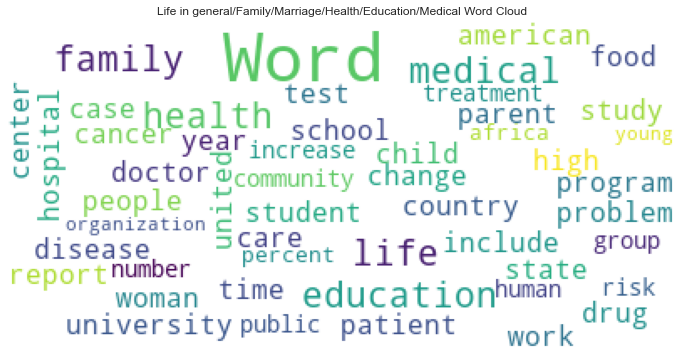

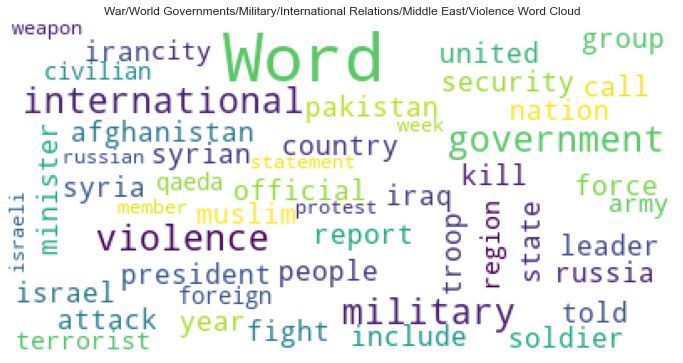

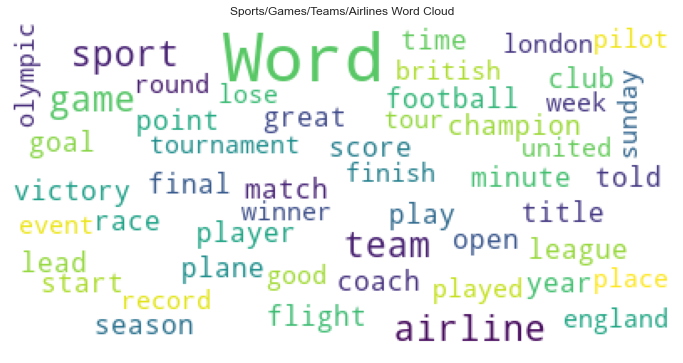

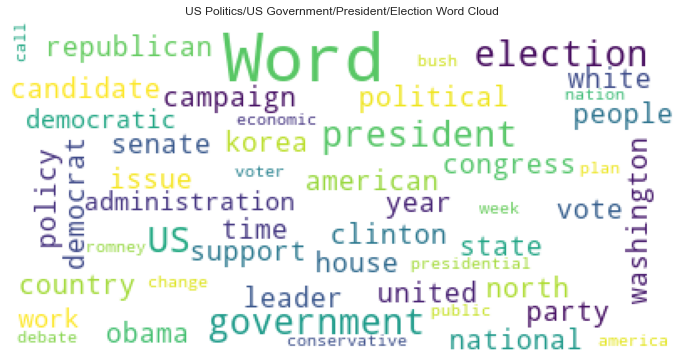

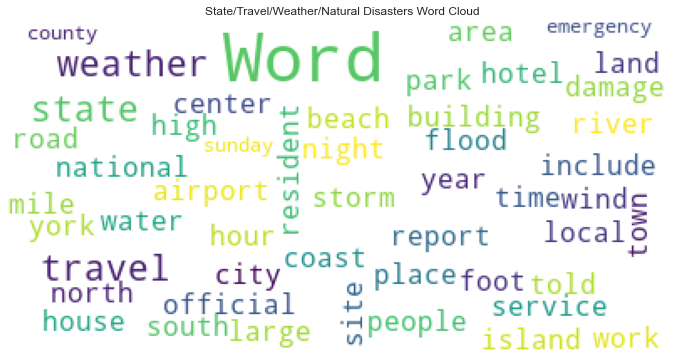

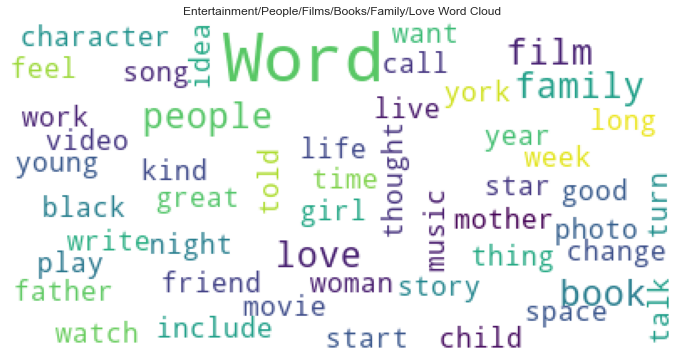

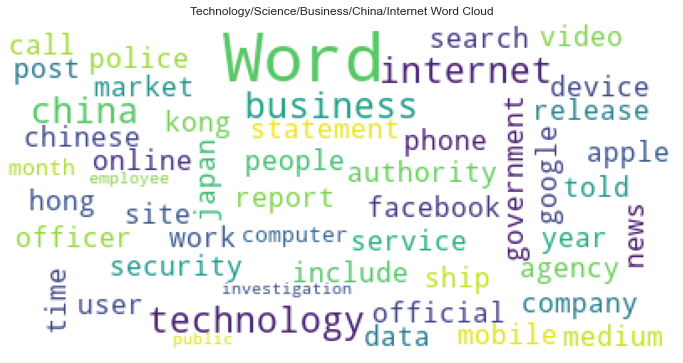

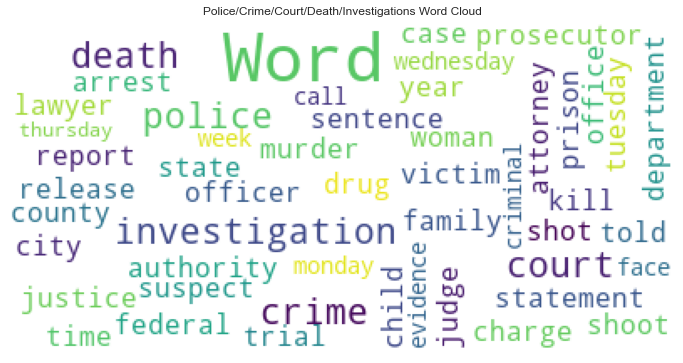

In [157]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
for col in df_topic_50_keywords.T.columns:
    mpl.rcParams['figure.figsize']=(12.0,12.0)  
    mpl.rcParams['font.size']=12            
    mpl.rcParams['savefig.dpi']=100             
    mpl.rcParams['figure.subplot.bottom']=.1 
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              max_words=50,
                              max_font_size=40, 
                              random_state=42
                             ).generate(str(df_topic_50_keywords.T[col]))

    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.title(f'{col} Word Cloud')
    plt.axis('off')
    plt.show()